In [1]:
import numpy as np
import matplotlib as plt
import math
import scipy

In [3]:
from sklearn.linear_model import LinearRegression
correct_ab = [1, 2]
correct_c = 3
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array(correct_ab)) + correct_c # y = X * [1,2] = 1 * x_0 + 2 * x_1 + 3
#call fit method of LinearRegression Class, returns reg object
reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

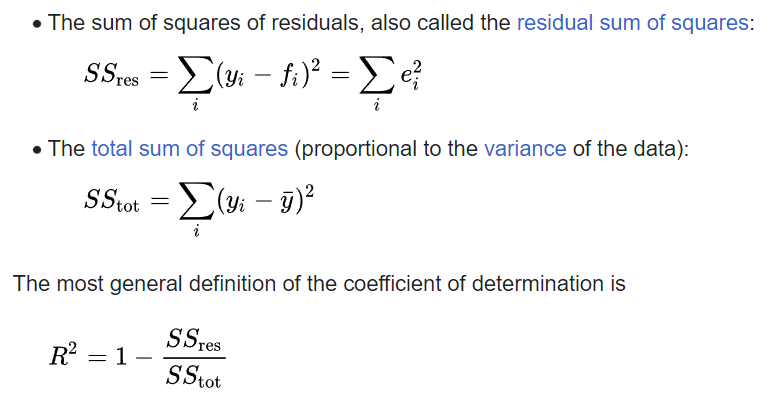

In [5]:
print("X: ", X)
print("y: ", y)

#reg has attributes coef_ as array, intercept_ as float, score as float
print("R2: ", reg.score(X, y)) #score is the coefficient of determination
#score is close to 1 if residual error total is 0.
#ex. for y = ax^2 + b^x + c, coef = [a, b], intercept = c.
#ex. for y = mx+b, coef = [m], intercept = b.

print("Solved Coefficients: ", reg.coef_)
print("Solved Intercept: ", reg.intercept_)
print("\nSolved y = ", reg.coef_[0], "*x_0 + ", reg.coef_[1], "*x_1 + ", reg.intercept_)
print("Correct y = ", correct_ab[0], "*x_0 + ", correct_ab[1], "*x_1 + ", correct_c)

print("Predicted value for x = (3, 5): ", reg.predict(np.array([[3, 5]])))

X:  [[1 1]
 [1 2]
 [2 2]
 [2 3]]
y:  [ 6  8  9 11]
R2:  1.0
Solved Coefficients:  [1. 2.]
Solved Intercept:  3.0000000000000018

Solved y =  1.0 *x_0 +  1.9999999999999993 *x_1 +  3.0000000000000018
Correct y =  1 *x_0 +  2 *x_1 +  3
Predicted value for x = (3, 5):  [16.]


In [19]:
#assume we know that y = m*x + b
x_list = []
y_list = []
y_exact_list = []
m = -1.5
b = 2.7

for i in range (-3, 4): #i = -3, -2, -1, 0, 1, 2, 3
  y_e = m*i + b #y_e exact
  y_i = round(y_e) + 0*(np.random.random_sample() - 0.5) #try values: 0, 6, 8
  x_list.append(i)
  y_list.append(y_i)
  y_exact_list.append(y_e)
print("x, y list: ", x_list, y_list)


x, y list:  [-3, -2, -1, 0, 1, 2, 3] [9.553662116113166, 3.282545862734845, 6.026471237713214, 1.0883936044325075, 4.458079447619007, 0.8785814115220081, -3.9795083111394955]


In [20]:
x = np.array(x_list)
y = np.array(y_list)
y_exact = np.array(y_exact_list)
print("x = \n", x)
print("y = \n", y)

x = 
 [-3 -2 -1  0  1  2  3]
y = 
 [ 9.55366212  3.28254586  6.02647124  1.0883936   4.45807945  0.87858141
 -3.97950831]


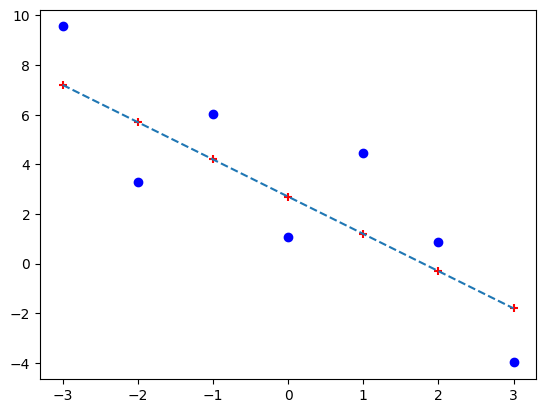

In [21]:
plt.pyplot.scatter(x, y, c="b", marker = "o") #blue circle rounded y
plt.pyplot.scatter(x,y_exact, c="r", marker = "+") #red + for y exacvt
plt.pyplot.plot(x, y_exact, linestyle = "--") #draw line (exact)
plt.pyplot.show()

In [22]:
#x first be converted into a matrix (2D array)
X = x.reshape(x.shape[0], 1) #will create matrix of 1 column, from the vector (which is always 1 column)
print("x vector: ", x)
print("X matrix: \n", X)

x vector:  [-3 -2 -1  0  1  2  3]
X matrix: 
 [[-3]
 [-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]]


In [23]:
reg = LinearRegression() #reg is object of regression class
reg.fit(X, y)
print("R2: ", reg.score(X, y))
#score is the coefficient of determination
#score is close to 1 if residual error total is 0.

#ex. for y = mx+b, coef = [m], intercept = b.
#ex. for y = ax^2 + b^x + c, coef = [a, b], intercept = c.
print("Coefficients: ", reg.coef_)

print("Intercept: ", reg.intercept_)

print("m = ", reg.coef_[0], "b = ", reg.intercept_)

print("Predicted value for x = 3: ", reg.predict(np.array([[3]])))

R2:  0.7089269945037371
Coefficients:  [-1.67770828]
Intercept:  3.0440321955707503
m =  -1.6777082847956382 b =  3.0440321955707503
Predicted value for x = 3:  [-1.98909266]


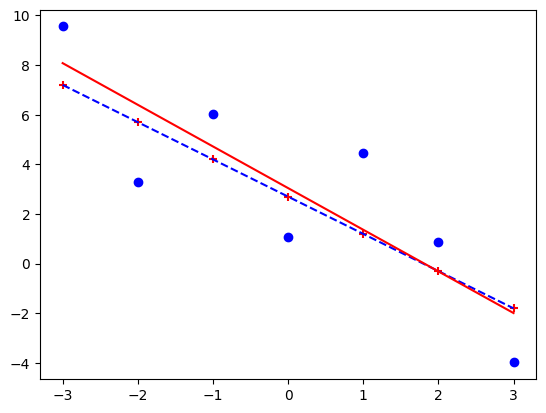

In [24]:
#Plot Computed Line
y_computed = reg.coef_[0]*x + reg.intercept_
plt.pyplot.scatter(x, y, c="b", marker = "o") #blue circle rounded y
plt.pyplot.scatter(x,y_exact, c="r", marker = "+") #red + for y exacvt
plt.pyplot.plot(x, y_exact, linestyle = "--", c = "b") #draw line (exact)
plt.pyplot.plot(x, y_computed, linestyle = "-", color = "r") #draw line (exact)
plt.pyplot.show()

In [25]:
reg = LinearRegression() #reg is object of regression class
reg.fit(X, y)

print("R2: ", reg.score(X, y))
#score is the coefficient of determination
#score is close to 1 if residual error total is 0.

#ex. for y = mx+b, coef = [m], intercept = b.
#ex. for y = ax^2 + b^x + c, coef = [a, b], intercept = c.
print("Coefficients: ", reg.coef_)

print("Intercept: ", reg.intercept_)

print("m = ", reg.coef_[0], "b = ", reg.intercept_)

print("Predicted value for x = 3: ", reg.predict(np.array([[3]])))

R2:  0.7089269945037371
Coefficients:  [-1.67770828]
Intercept:  3.0440321955707503
m =  -1.6777082847956382 b =  3.0440321955707503
Predicted value for x = 3:  [-1.98909266]


In [26]:
from scipy.optimize import curve_fit

In [27]:
#you only need to supply the function to be fit. x_i is passed.
def f_line(x_array, m, b):
    y_array = m*x_array + b
    return y_array

In [28]:
popt, pcov = curve_fit(f_line, x, y)
print("m, b: ", popt)

m, b:  [-1.67770828  3.0440322 ]
